## Sarah Liu: SSL2190

# Deep Learning In Biomedical Imaging
## BMENE4460-2024-1

### <span style="color:red">Assignment 1</span> - Machine Learning basics

#### Due date/time: <span style="color:red">February 16, 11:59 pm (EST)</span>

#### Instructions:
1. You may use any publicly available resources to answer the questions, but you need to ***cite*** them properly to prevent plagiarism.
2. Using or copying other students' solutions is considered cheating, and you'll be graded **"0" for the entire assignment**.
3. You may be asked to write Python code or to explain something in each question. To write your answers, please use code and markdown blocks, respectively. If you need to better organize your answers, you may add more blocks. In this notebook, we placed a code block with a comment as `# [Your code here]` and a markdown block with the text "<span style="color:red">Your answer here</span>" for each question that needs them. If you wish to answer, please remove the comments first.
4. Please ***use comments at the beginning of each code blocks*** to explain what you've implemented in that block.
5. Please ***use LaTex formatting to write equations and formulas*** in markdown blocks wherever is needed.
6. Please define your variables with ***short and meaningful names***.
7. For this assignment, you ***do not need GPU access***.
8. Please ensure you have internet access, otherwise the figure may not be displayed.
9. Q2 requires access to a public dataset, you can either import the downloaded notebook to Kaggle for data access; or you can download data (it is just a spreadsheet) to your local computer. See Q2 for details.
10. To import notebook into Kaggle, just simply go to https://www.kaggle.com/code, click 'New Notebook', and in the upper left, click 'File' and select 'Import Notebook'. If you finish your notebook on Kaggle, remember to download the notebook (File-> Download Notebook) and submit it to the Courseworks. If you are not familiar with Kaggle, <span style="color:red">see appendix in the PDF file for details</span>.


#### How to submit:
Once you finish the assignment, remember to <span style="color:red">"Run All"</span>. Ensure your outputs are appropriately displayed prior to submission!

Submission:
1. Rename the notebook as "BMEN4460_2024_Assignment1_Notebook_{YourUNI}" (Replace "{YourUNI}" with your UNI!).
2. Submit to Courseworks. 

**Acknowledgment:**
Soroush Arabshahi sa3617@columbia.edu

In [39]:
# Run this cell to import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducebility
np.random.seed(4460)

#### <span style="color:red">(15 pts.) Q1. </span> Linear Regression

##### Define the following variables:
$$
N = 100 \\
a = 2 \\
b = -1
$$

In [61]:
# Defining variables
N = 100
a = 2
b = -1

##### Using [`np.random.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) function, create a random variable that vary between $[-10, 10)$ with the size of $N$, and name it `x`.
##### Similarly use [`np.random.randn`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) function to create `n` as the Gaussian noise with the same size $N$.

In [62]:
# Creating random uniform distribution and Gaussain noise
x = np.random.uniform(-10, 10, N)
n = np.random.randn(N)

##### Now define `y` as:
$$
y = ax+b+n
$$

In [63]:
# Defining y
y = a*x + b + n

##### Print the shape of `x`, and `y`.

In [64]:
# Shapes of x and y
print(y.shape, x.shape)

(100,) (100,)


##### Now using [`np.vstack`](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) and [`np.ones_like`](https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html) functions, concatante a column of ones to`x`. Then name the new variable as `x_b` and print its shape. The `x_b` should look like as below:
$$
x = \begin{bmatrix} x^{(1)} \\ x^{(2)} \\ \vdots \\ x^{(100)} \end{bmatrix}   \rightarrow x_{b} = \begin{bmatrix} 1 & x^{(1)} \\ 1 & x^{(2)} \\ \vdots & \vdots \\ 1 & x^{(100)} \end{bmatrix}
$$

Note: Be mindful of rows and columns. If the `x_b.shape` is not `(100,2)`, use `.T` (like `x_b = x_b.T`) to transpose the design matrix into right shape.

In [65]:
# Adding column of ones to x
ones = np.ones_like(x)
x_b = np.vstack((ones, x)).T 

##### Now that the desired matrix is created, use [`np.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.lingalg.inv.html), `.T`, and `@` functions and operators to compute $\beta$ values. Assign the result to `beta` variable and print the `beta`.

Reminder: In linear regression we assume $Y=X\beta$.

Note: `@` operator computes matrix dot product.

In [66]:
# Computing beta values

beta = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y
beta

array([-0.96367674,  2.00538072])

##### How accurately did we estimate the slope ($a$) and the intercept ($b$)?

<span style="color:red">The estimate is quite close. We extimated a slope of 1.99, which is quite close to the real slope of a = 2, and an intercept of -1.07, which is also quite close to the real intercept at -1.</span>

##### Multiply `x_b` by `beta` and assign the result to `y_hat`. Then print the `y_hat`.
$$
\hat{y} = x_b\beta
$$

In [67]:
# Calculating projected y values
y_hat = x_b @ beta
y_hat

array([-12.29878332, -17.87942693, -13.23082394,   7.43299265,
         0.68148308,  10.98081624, -12.8883854 ,   0.72346948,
       -14.04924214, -20.68291719,  16.57227877, -20.9042905 ,
        -9.25384456,  -6.83177584, -15.03033794,  18.64682245,
         0.6470135 , -10.89152508,  -1.01477388,   8.54317354,
       -19.36878291,  -2.49512783,  15.9658223 ,  12.84523785,
        17.03388221,  -1.82597414,   2.61324834,   2.94948201,
        -0.2574188 ,   4.16509134,  11.52412049,  10.44895881,
        12.85492623,  10.20392413,  -1.55422489,  17.82482608,
        10.84012228,   7.65722527,   2.33360386,  17.55101721,
        -6.36362676,  -3.65007085,  14.57582646,  15.4291404 ,
         6.71463243,   7.3195365 ,  -9.69981751,  -1.13926542,
         0.19355685, -18.09562515,   4.58704198,  -8.31431219,
        13.88982259,   0.75764434,  -8.89633585, -18.79249565,
       -11.30056707,   3.74751563,  -6.63207793,  -6.28260873,
         0.07670204, -18.60059014,   9.20363793, -12.90

##### Using [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) plot `x` and `y` and overlay it with the scatter plot of `x` and `y_hat`.

What you should expect:
<div align="center"><img src="https://github.com/soroush361/AoE_BME/blob/main/AS1_Q1_F1.png?raw=true" /></div>

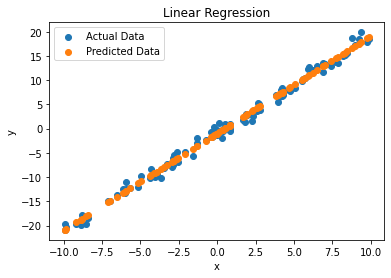

In [68]:
# Plotting projected y values with real y values
plt.scatter(x, y)
plt.scatter(x, y_hat)
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Actual Data","Predicted Data"])

##### Now try to solve this synthetic regression problem using [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model of the [`sklearn`](https://scikit-learn.org/stable/index.html) package. Then compare the results.

Note: Don't forget to import the package.

A comprehensive example: https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

What you should expect:
<div align="center"><img src="https://github.com/soroush361/AoE_BME/blob/main/AS1_Q1_F2.png?raw=true" /></div>

In [69]:
# importing sklearn
import sklearn.linear_model as sk1

In [70]:
# Creating regression model
regressor = sk1.LinearRegression()
regressor.fit(x.reshape(-1,1), y.reshape(-1,1))
print(regressor.intercept_)
print(regressor.coef_)

[-0.96367674]
[[2.00538072]]


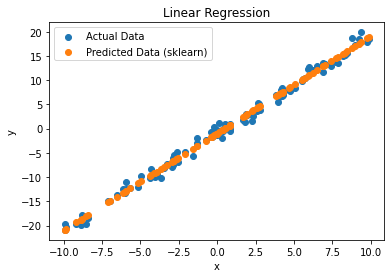

In [71]:
# Plotting sklearn projected y values with real y values
y_sk = x*regressor.coef_ + regressor.intercept_

plt.scatter(x, y)
plt.scatter(x, y_sk)
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Actual Data","Predicted Data (sklearn)"])

<span style="color:red">The sklearn regression package produced the same results as the initial regression. They both calculated an intercept of -1.07 and a slope of 1.99 based on the inputted data. </span>

#### <span style="color:red">(15 pts.) Q2. </span> Classification 

In this question, we will try to classify the heart attack risk based on 13 features (e.g., age, sex, number of major vessels, chest pain, etc). The detailed introduction can be found at https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset.

To start, you should **first add the dataset to this notebook**. Click +Add Data on the top right and search for 'Heart Attack Analysis & Prediction Dataset', then click Add. 

The path of added dataset is under: **../input/**

You will need to use pandas, sklearn, and matplotlib packages. 

Q2.a: Load the .csv file (heart.csv) using Pandas package, print the dataset and its shape:

In [51]:
# importing heart data
data = pd.read_csv("archive/heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [52]:
# shape of imported dataframe
data.shape

(303, 14)

Q2.b: Convert the pandas.DataFrame to numpy array and split the dataset into input features **x** and output label **y**. Then split them into training and testing subsets in a ratio of 7:3 using sklearn train_test_split. Set a random state for a reproducible result.


In [72]:
import sklearn.model_selection as sk2

In [97]:
# preprocessing data into training and testing datasets
np_data = data.to_numpy()

x = np_data[:, 0:13]
y = np_data[:, 13]

x_train, x_test, y_train, y_test = sk2.train_test_split(x, y, test_size=0.3, random_state=50)

Q2.c: Using the pre-defined kNN class in the sklearn package ([`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)), fit the training data and test the model on the testing data

Note: Set the `n_neighbors` to 7, which indicates the $K$ in KNN algorithm (The default value is 5).

In [74]:
import sklearn.neighbors as sk3

In [86]:
# training classifier using KNN algorithm with 7 neighbors
classifier = sk3.KNeighborsClassifier(7)
classifier.fit(x_train, y_train)

classifier.score(x_test, y_test)

0.6813186813186813

Q2.d: Plot the confusion matrix. And report the accuracy, precision, and recall scores. Discuss the difference and relationship among these scores. How can you interpret them using the confusion matrix?

What you should expect:
<div align="center"><img src="https://github.com/soroush361/AoE_BME/blob/main/AS1_Q2_F1.png?raw=true" /></div>

In [79]:
import sklearn.metrics as sk4

Text(0.5, 1.0, 'Confusion Matrix')

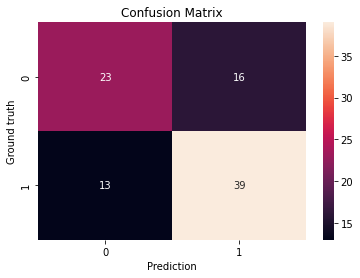

In [87]:
# Visualizing confusion matrix
conf_mtx = sk4.confusion_matrix(y_test, classifier.predict(x_test))
sns.heatmap(conf_mtx, annot=True)
plt.xlabel("Prediction")
plt.ylabel("Ground truth")
plt.title("Confusion Matrix")

<span style="color:red">In the confusion matrix, the predicted values are on the horizontal axis and the actual true values are on the vertical axis. According to our algorithm using KNN, the model predicted "1" correctly in about 39% of its total predictions. Additionally, it predicted "0" correctly in about 23% of the predictions. According to the confusion matrix, about 29% (13% false negative, 16% false positive) of the predictions were incorrect.</span>

Q2.e: The accuracy of kNN Classifier is not very high. Notice that we still stick with raw data by far. Propose a preprocessing technique that may potentially improve classification accuracy.

What you should expect:
<div align="center"><img src="https://github.com/soroush361/AoE_BME/blob/main/AS1_Q2_F2.png?raw=true" /></div>

In [148]:
# Normalizing data
norm_x = np.zeros((len(x), len(x[0])))

for col in range(len(x[0])):
    column = x[:,col]
    avg = column.sum()/len(np_data)
    std_dev = column.std()
    norm_x[:,col] = (column-avg)/column.std()

norm_x 

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [151]:
# Training a new KNN model on the normalized data
norm_x_train, norm_x_test, norm_y_train, norm_y_test = sk2.train_test_split(norm_x, y, test_size=0.3, random_state=50)

norm_classifier = sk3.KNeighborsClassifier(7)
norm_classifier.fit(norm_x_train, norm_y_train)

norm_classifier.score(norm_x_test, norm_y_test)

0.8241758241758241

Text(0.5, 1.0, 'Confusion Matrix')

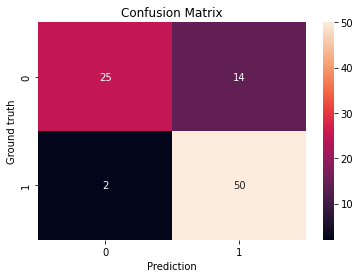

In [153]:
# Re-calculating confusion matrix
conf_mtx = sk4.confusion_matrix(norm_y_test, norm_classifier.predict(norm_x_test))
sns.heatmap(conf_mtx, annot=True)
plt.xlabel("Prediction")
plt.ylabel("Ground truth")
plt.title("Confusion Matrix")

<span style="color:red">By normalizing each of the features around 0 before training the KNN algorithm, the mean accuracy of the model improves considerably, jumping from 68% to 82%. </span>

#### <span style="color:red">(15 pts.) Q3. </span> Clustering

Using [`np.random.randn`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html), create the following random variables with a size of $N=100$.
$$
x_1 \sim \mathcal{N}(\mu=3,\sigma=2) \\
y_1 \sim \mathcal{N}(\mu=3,\sigma=2) \\
x_2 \sim \mathcal{N}(\mu=-3,\sigma=2) \\
y_2 \sim \mathcal{N}(\mu=-3,\sigma=2) \\
$$

In [155]:
# Creating random normal distributions
x1 = 3 + 2 * np.random.randn(N)
y1 = 3 + 2 * np.random.randn(N)
x2 = -3 + 2 * np.random.randn(N)
y2 = -3 + 2 * np.random.randn(N)

##### Usint Scatter plot of the matplotlib library ([`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)), plot $(x_1, y_1)$ and $(x_2, y_2)$ with different colors.

What you should expect:
<div align="center"><img src="https://github.com/soroush361/AoE_BME/blob/main/AS1_Q3_F1.png?raw=true" /></div>

Text(0.5, 1.0, 'K-Means: True Data')

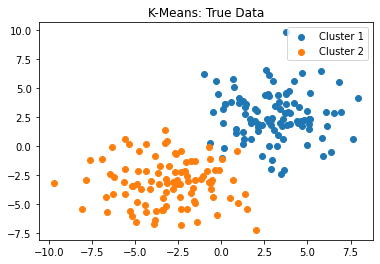

In [158]:
# Plotting true clusters
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.legend(["Cluster 1", "Cluster 2"])
plt.title("K-Means: True Data")

##### As you should see, we have two clusters that we synthetically created.

##### Now we want to know how well the k-Means model of the Sklearn module is able to recover the same clusters.

##### First, import the [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) model from Sklearn library.

In [161]:
# importing KMeans
from sklearn.cluster import KMeans 

##### Then using [`np.vstack`](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) and [`np.hstack`](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html) functions, combine all $x_1,y_1,x_2,$ and $y_2$ variables to make a $z$ matrix that should looks like the below:

$$
z = \begin{bmatrix} x^{(1)}_1 & y^{(1)}_1 \\ x^{(2)}_1 & y^{(2)}_1 \\ \vdots & \vdots \\ x^{(100)}_1 & y^{(100)}_1 \\ x^{(1)}_2 & y^{(1)}_2 \\ x^{(2)}_2 & y^{(2)}_2 \\ \vdots & \vdots \\ x^{(100)}_2 & y^{(100)}_2  \end{bmatrix}
$$

##### Print the shape of $z$ to make sure your design matrix is in right shape. It should be $(200, 2)$. Use `.T` to transpose it, if it is not.

In [215]:
# Creating z matrix from x and y matrices
z = np.vstack((np.hstack((x1, x2)), np.hstack((y1, y2)))).T
z.shape

(200, 2)

##### Just to check, make a scatter plot of $(z[:,0], z[:,1])$ to ensure the design matrix (which is given in a real world problem) looks the same as the data we have generated before. The scatter plot must be in the same color.

What you should expect:
<div align="center"><img src="https://github.com/soroush361/AoE_BME/blob/main/AS1_Q3_F2.png?raw=true" /></div>

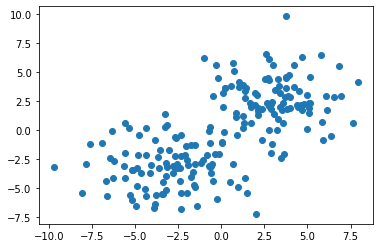

In [173]:
# Checking z matrix with scatter plot
plt.scatter(z[:,0], z[:,1])

##### Create an instance of the K-Means model with $k=2$ (`n_clusters=2`), call `fit` function to clutsre the `z` matrix.

In [404]:
# Creating K-Means model to cluster z datapoints
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(z)

KMeans(n_clusters=2, random_state=0)

##### Now that the KMeans model is fitted, scatter plot the $z$ samples ($(z[:,0], z[:,1])$) and paint them with the labels that the KMeans model returned. (read the reference: [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html))
##### Also, plot the cluster centroids with a different marker and color.

What you should expect:
<div align="center"><img src="https://github.com/soroush361/AoE_BME/blob/main/AS1_Q3_F3.png?raw=true" /></div>

In [405]:
# Get clusters and centroids from KMeans model
labels = kmeans.predict(z)
centroids  = kmeans.cluster_centers_ 

data_labels = np.vstack((z.T, labels.T)).T

cluster_1 = data_labels[np.where(data_labels[:,2] == 1)]
cluster_2 = data_labels[np.where(data_labels[:,2] == 0)]

Text(0.5, 1.0, 'Predicted Clusters with Centroids (K=2)')

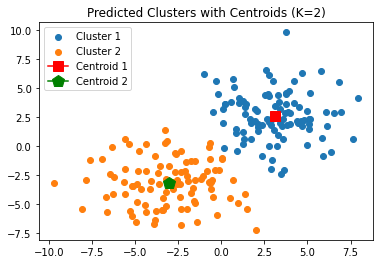

In [410]:
# plot centroids and clusters
plt.scatter(cluster_1[:,0], cluster_1[:,1])
plt.scatter(cluster_2[:,0], cluster_2[:,1])

plt.plot(centroids[1][0], centroids[1][1], color="red", marker="s", markersize=10)
plt.plot(centroids[0][0], centroids[0][1], color="green", marker="p", markersize=12)

plt.legend(["Cluster 1", "Cluster 2", "Centroid 1", "Centroid 2"])
plt.title("Predicted Clusters with Centroids (K=2)")

##### Consider the original distributions, how many samples did the KMeans model clustered incorrectly?

In [411]:
# Identifying incorrectly clustered samples
correct_labels_1 = np.vstack((x1, y1, np.ones(100)))
correct_labels_2 = np.vstack((x2, y2, np.zeros(100)))

correct_labels = np.hstack((correct_labels_1, correct_labels_2)).T

wrong_labels = data_labels
wrong_labels = np.delete(wrong_labels, np.where(wrong_labels[:, 2] == correct_labels[:, 2]), 0)
len(wrong_labels)

3

<span style="color:red"> 3 samples were clustered incorrectly. </span>

##### This part does not grant you extra points, but will help you understand better and also if you complete it, it will help your missing points upto 5 points.

(Optional) Plot the samples that has been labeled incorrectly.

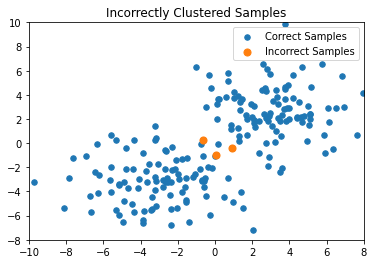

In [402]:
# plotting incorrectly labeled samples
plt.scatter(z[:,0], z[:,1], s=30)
plt.scatter(wrong_labels[:,0], wrong_labels[:,1], s=50)

plt.xlim(-10, 8)
plt.ylim(-8, 10)
plt.title("Incorrectly Clustered Samples")
plt.legend(["Correct Samples", "Incorrect Samples"])

(Optional) Repeat the same procedure with $K=4$. How would that change the clustering plot? Briefly explain.

In [412]:
# Creating new KMeans model with 4 clusters instead of 2
kmeans2 = KMeans(n_clusters=4, random_state=0)
kmeans2.fit(z)

labels2 = kmeans2.predict(z)
centroids2  = kmeans2.cluster_centers_ 

data_labels2 = np.vstack((z.T, labels2.T)).T

cluster_4 = data_labels2[np.where(data_labels2[:,2] == 0)]
cluster_5 = data_labels2[np.where(data_labels2[:,2] == 1)]
cluster_6 = data_labels2[np.where(data_labels2[:,2] == 2)]
cluster_7 = data_labels2[np.where(data_labels2[:,2] == 3)]

Text(0.5, 1.0, 'Predicted Clusters with Centroids (K=4)')

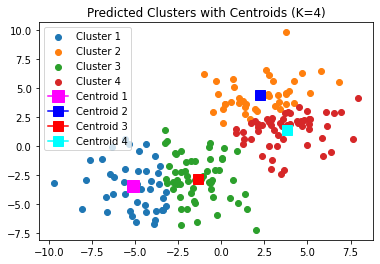

In [413]:
# plot centroids and clusters
plt.scatter(cluster_4[:,0], cluster_4[:,1])
plt.scatter(cluster_5[:,0], cluster_5[:,1])
plt.scatter(cluster_6[:,0], cluster_6[:,1])
plt.scatter(cluster_7[:,0], cluster_7[:,1])

plt.plot(centroids2[0][0], centroids2[0][1], color="magenta", marker="s", markersize=12)
plt.plot(centroids2[1][0], centroids2[1][1], color="blue", marker="s", markersize=10)
plt.plot(centroids2[2][0], centroids2[2][1], color="red", marker="s", markersize=10)
plt.plot(centroids2[3][0], centroids2[3][1], color="cyan", marker="s", markersize=10)

plt.legend(["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Centroid 1", "Centroid 2", "Centroid 3", "Centroid 4"])
plt.title("Predicted Clusters with Centroids (K=4)")

<span style="color:red">Shown by the graph above, there are now four distinct clusters, each with their own centroid. The data, however, does not seem to be a good fit for 4 clusters, just based on visual apprasial.</span>